In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3
%matplotlib inline

In [3]:
def velocity_field(x, y, chi, alpha):
    # assume a = 1, U = 1
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    u = (r*(2*chi*r - (r**2 + 1)*np.sin(alpha - theta))*np.sin(theta) + (r**2 - 1)*np.cos(theta)*np.cos(alpha - theta))/r**2
    v = (-r*(2*chi*r - (r**2 + 1)*np.sin(alpha - theta))*np.cos(theta) + (r**2 - 1)*np.sin(theta)*np.cos(alpha - theta))/r**2
    return u, v

def stagnation(chi, alpha):
    # assume a = 1
    if chi > 1: 
        r = chi + np.sqrt(chi**2 - 1)
        theta = np.array([alpha - np.pi/2])
    else:
        r = 1
        theta = np.array([
            alpha - np.arcsin(chi),
            alpha + np.arcsin(chi) - np.pi,
        ])
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

def lift_drag(chi, alpha):
    return 4*np.pi*chi*np.cos(alpha), -4*np.pi*chi*np.sin(alpha)

def inside_circle(X, Y):
    return X**2 + Y**2 < 1

In [12]:
# Inputs
N = 100  # Number of grid points in each direction
side = 3   # Half-width and half-height of grid
chi = 1.1   # Non-dimensional vortex strength
alpha = 30  # Angle of attack in degrees
density = 1.5

In [13]:
# Process inputs
x = np.linspace(-side, side, N)
X, Y = np.meshgrid(x, x)
alpha = np.deg2rad(alpha)

In [14]:
# Compute everything
U, V = velocity_field(X, Y, chi, alpha)
Xs, Ys = stagnation(chi, alpha)
cl, cd = lift_drag(chi, alpha)
speed = np.sqrt(U*U + V*V)
inside_mask = inside_circle(X, Y)
speed[inside_mask] = 0
lw = 4*speed/speed.max()

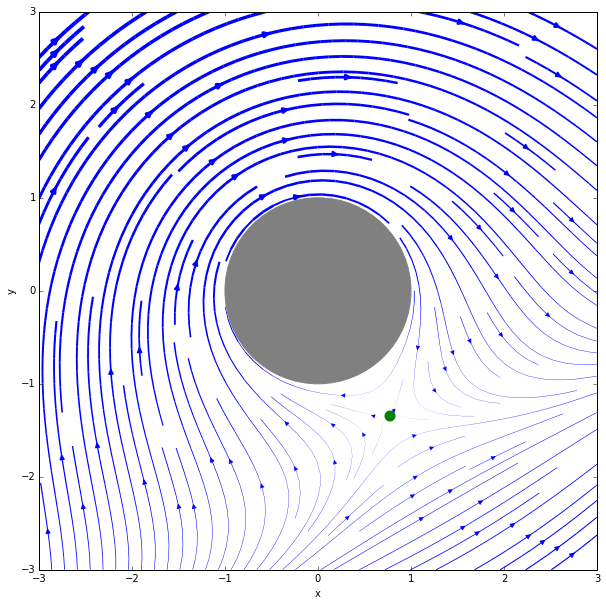

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-side, side)
ax.set_ylim(-side, side)
ax.set_xlabel('x')
ax.set_ylabel('y')
# strm = ax.streamplot(X, Y, U, V, density=density, linewidth=2, color=speed, cmap=plt.cm.viridis)
# fig.colorbar(strm.lines)
ax.streamplot(X, Y, U, V, density=density, linewidth=lw+0.01, color='b')
circle = plt.Circle((0, 0), radius=1, color='gray', alpha=1)
ax.add_patch(circle)
ax.scatter(Xs, Ys, color='g', s=100, marker='o')
# mpld3.show()
plt.show()